In [117]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
path = "C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Predictions éléctions\\PRESIDENTIELLES_1965-2012-csv\\" 
path_to_csv = "C:\\Users\\Mohamed\\git\\Elections\\Analyses\\Jointure des tables\\"


In [118]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [119]:
dft11.drop('Unnamed: 0', axis=1, inplace=True)

# Taux de gauche : 

In [120]:
dft12 = dft11.drop(["code", "département", 'taux_Abstention', 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert', 'taux_xdroite','taux_centre', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date"], axis=1)

dft12 = dft12[dft12["Année"]!=1981]

dft12["Date"] = dft12["Année"] - 1987

dft12.dropna(axis=1, inplace=True)

df_train = dft12[dft12["Année"]!=2012]
df_train.drop("Année", axis=1, inplace=True)
df_test = dft12[dft12["Année"]==2012]
df_test.drop("Année", axis=1, inplace=True)
df_train_x = df_train.drop("taux_gauche", axis=1)
df_train_y = df_train["taux_gauche"]
df_test_x = df_train.drop("taux_gauche", axis=1)
df_test_y = df_train["taux_gauche"]



C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
ss = StandardScaler()
df_train_x = ss.fit_transform(df_train_x)
df_test_x = ss.transform(df_test_x)

In [122]:
from sklearn.svm import LinearSVR
from sklearn import metrics

svr = LinearSVR()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

svr.score(df_test_x, df_test_y)

3.9521071134
1.41187049036


0.8804533863528986

In [123]:
from sklearn.linear_model import LinearRegression

svr = LinearRegression()
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_train.drop("taux_gauche", axis=1).columns[i])

svr.score(df_test_x, df_test_y)


3.50872183106
1.4694038405
0.0469814137331 depart_frontalier
0.146822191185 depart_CORSE
0.155799221366 0-19ans
-0.0061062356942 20-39ans
-1.97796037995 40-59ans
-0.999583015436 60-74ans
1.70084758139 75+ans
0.0165243824501 Naissances domiciliées par département
-0.493072462614 Nombre total de mariages domiciliés
-0.555192731157 Décès domiciliés par département
0.124192587972 var_chomage_annee
-0.00333223419203 taux_chomage
-0.773040036092 taux_centre_sup_moyenne
-0.944024132466 taux_droite_sup_moyenne
0.928097644251 taux_gauche_sup_moyenne
0.572193468342 taux_vert_sup_moyenne
-1.28163620709 taux_xdroite_sup_moyenne
0.0890133379802 taux_xgauche_sup_moyenne
0.0189663923001 taux_Abstention_sup_moyenne
-0.395986603642 taux_Blancs et nuls_sup_moyenne
-0.220524831511 pop_centre
-0.329042717116 pop_droite
0.169355923346 pop_gauche
-0.362348666349 pop_xdroite
-0.476084588471 pop_xgauche
-0.163620845185 pop_premier_ministre
-0.327218171805 cohabitation
0.0206179408234 pop_president
0.259890637

0.89386527209479427

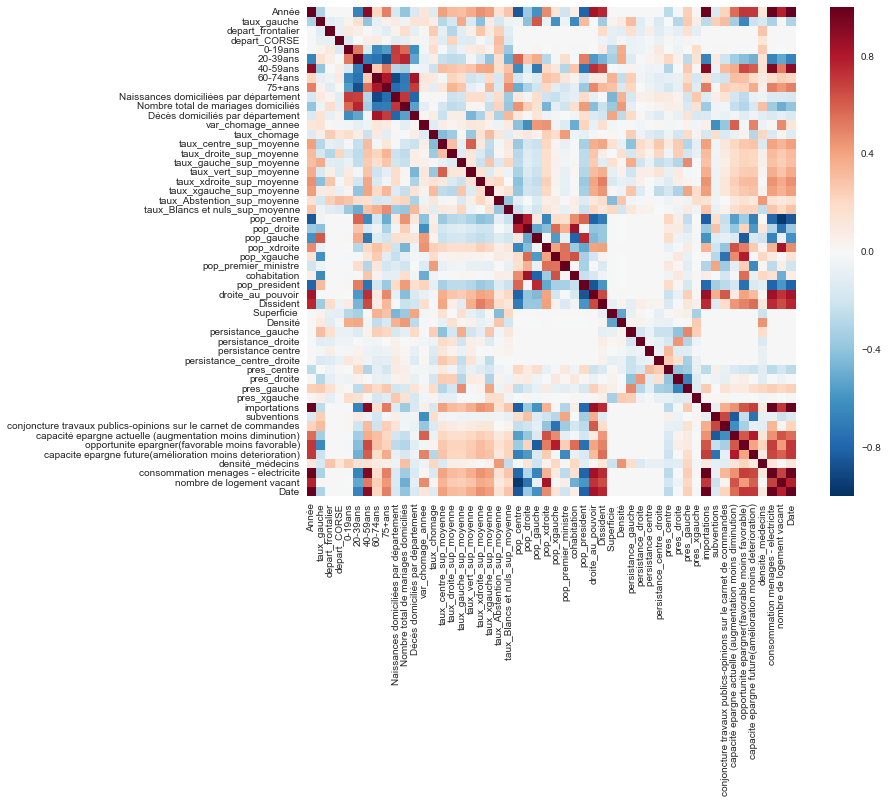

In [124]:
import matplotlib.pyplot as plt

corrmat = dft12.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [125]:
import statsmodels.api as sm

# df_train_x1 = df_train_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# df_test_x1 = df_test_x[["var_chomage_annee", "taux_gauche_sup_moyenne", "40-59ans"]]
# print(df_test_x1.shape, df_train_x1.shape)
X = sm.add_constant(df_train_x)
X_test = sm.add_constant(df_test_x)

model = sm.OLS(df_train_y, X)
results = model.fit()
print(metrics.r2_score(results.predict(X_test), df_test_y))

#print(metrics.r2_score(model.predict(df_test_x), df_test_y))
print(results.summary())

0.881263171063
                            OLS Regression Results                            
Dep. Variable:            taux_gauche   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     83.74
Date:                Fri, 24 Mar 2017   Prob (F-statistic):          1.22e-147
Time:                        15:13:39   Log-Likelihood:                -785.88
No. Observations:                 384   AIC:                             1644.
Df Residuals:                     348   BIC:                             1786.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.5437      0.100    2

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO 

svr = DecisionTreeRegressor(max_depth=10)
svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.feature_importances_)):
    print(svr.feature_importances_[i], df_train.drop("taux_gauche", axis=1).columns[i])



0.0809423383552
0.125539832788
0.99755158902
0.0 depart_frontalier
3.65020444211e-05 depart_CORSE
0.00385880963076 0-19ans
0.00319694908377 20-39ans
0.00704428509427 40-59ans
0.00255059785113 60-74ans
0.00401986847646 75+ans
0.00800238583336 Naissances domiciliées par département
0.00400264836061 Nombre total de mariages domiciliés
0.00634326873032 Décès domiciliés par département
0.0105021030519 var_chomage_annee
0.00495955061194 taux_chomage
0.00540496585748 taux_centre_sup_moyenne
0.000617409184351 taux_droite_sup_moyenne
0.173292221836 taux_gauche_sup_moyenne
0.00355036598573 taux_vert_sup_moyenne
0.0113569725359 taux_xdroite_sup_moyenne
0.00841023195889 taux_xgauche_sup_moyenne
0.00405058382803 taux_Abstention_sup_moyenne
0.00865222997272 taux_Blancs et nuls_sup_moyenne
3.46489284557e-06 pop_centre
0.0 pop_droite
0.58744690224 pop_gauche
0.0 pop_xdroite
0.0 pop_xgauche
2.89026548648e-06 pop_premier_ministre
0.0 cohabitation
0.0 pop_president
2.38764628825e-05 droite_au_pouvoir
0.0

In [25]:

dot_data = tree.export_graphviz(svr, out_file=None,
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [127]:
from sklearn import linear_model
svr = linear_model.Lasso(alpha=0.1)

svr.fit(df_train_x, df_train_y)
print(metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
print(metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
print(metrics.r2_score(df_test_y, svr.predict(df_test_x)))

for i in range(len(svr.coef_)):
    print(svr.coef_[i], df_test.drop("taux_gauche", axis=1).columns[i])

3.92751398405
1.53436615061
0.881197299726
-0.0212843998461 depart_frontalier
-0.0 depart_CORSE
0.0 0-19ans
0.0 20-39ans
-1.27582390297 40-59ans
-0.0495769101172 60-74ans
0.0 75+ans
0.0 Naissances domiciliées par département
-0.0 Nombre total de mariages domiciliés
-0.0 Décès domiciliés par département
0.0 var_chomage_annee
-0.0 taux_chomage
-0.489217147916 taux_centre_sup_moyenne
-0.490892230524 taux_droite_sup_moyenne
1.39878229008 taux_gauche_sup_moyenne
0.132614162265 taux_vert_sup_moyenne
-1.16462481886 taux_xdroite_sup_moyenne
0.0211535604832 taux_xgauche_sup_moyenne
-0.0 taux_Abstention_sup_moyenne
-0.131765024548 taux_Blancs et nuls_sup_moyenne
-0.0 pop_centre
-0.0 pop_droite
0.0 pop_gauche
-0.0 pop_xdroite
-2.30434602627 pop_xgauche
-0.0 pop_premier_ministre
-0.0 cohabitation
0.0 pop_president
0.0 droite_au_pouvoir
-0.630615264519 Dissident
-0.0 Superficie 
0.208579985719 Densité
0.715773009883 persistance_gauche
-0.0 persistance_droite
-0.0 persistance centre
-0.0481028693229